<a href="https://colab.research.google.com/github/chandrusuresh/ReinforcementLearning/blob/master/Ch6-TD_Learning/Maximization_Bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

## Maximization Bias in Q Learning

This is an example of the markov random process Example 6.7 in page-134 from the book ["Reinforcement Learning" by Barto, Sutton](http://incompleteideas.net/sutton/book/the-book.html).

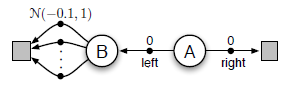

In [2]:
nodes = 4
actions = [-1,1]
num_actions = 2
start = 2

In [3]:
def gaussian_reward():
  return np.random.normal(-0.1,1)

def target_policy(Q,current,epsilon):
  action_prob = epsilon/float(num_actions)*np.ones((num_actions,))

  maxQ = np.max(Q[current,:])
  idx = np.where(Q[current,:] == maxQ)[0]

  action_prob[idx] += (1-epsilon)/float(len(idx))
  return np.random.choice(range(num_actions),p=action_prob)

def step(current,action):
  next_state = current + action
  reward = 0
  if next_state == 0:
    reward = gaussian_reward()
  return next_state,reward 

def QLearning(num_episodes,alpha,epsilon,gamma):
  Q = np.zeros((nodes,num_actions))
  stats = np.zeros((num_episodes,3))
  for episode in range(num_episodes):
    current = start
    stats[episode,0] = episode+1
    while current in [1,2]:
      act_idx = target_policy(Q,current,epsilon)
      a = actions[act_idx]
      next_state,reward = step(current,a)
      if current == start:
        stats[episode,2] += 1.0
        if next_state == start-1:
          stats[episode,1] += 1.0
      Q[current,a] += alpha*(reward + gamma*np.max(Q[next_state,:]) - Q[current,a])
      current = next_state
  return Q,stats

100%|██████████| 1000/1000 [00:34<00:00, 29.21it/s]


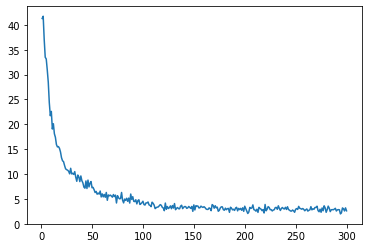

In [10]:
num_episodes = 300
num_runs = 1000#00
epsilon = 0.1
alpha = 0.1
gamma = 1

total_stats = np.zeros((num_episodes,2))
for run in tqdm(range(num_runs)):
  Q,stats = QLearning(num_episodes,alpha,epsilon,gamma)
  total_stats[:,1] += stats[:,1]/stats[:,2]*100
total_stats[:,0] = stats[:,0]
avg = total_stats[:,1]/float(num_runs)
plt.plot(total_stats[:,0],avg)